<center>
<h1> TP-Projet d'optimisation numérique </h1>
<h1> Algorithme des régions de confiance </h1>
</center>

# Régions de confiance avec Pas de Cauchy 

## Implémentation 

1. Coder l'algorithme du pas de Cauchy dans le fichier `src/cauchy.jl`). La spécification de cet algorithme est donnée dans le fichier.
2. Ecrire des tests exhaustifs (qui testent tous les cas de figure possibles) pour votre algorithme du pas de Cauchy. Vous remplirez pour cela le fichier `test/tester_cauchy.jl` sur le modèle des autres fichiers de tests et vous exécuterez dans la cellule de code ci-après ces tests.

In [41]:
include("../src/cauchy.jl")         # votre algorithme
include("../test/tester_cauchy.jl") # la fonction pour tester votre algorithme

#
tester_cauchy(cauchy); # tester l'algorithme

Test Summary: | Pass  Total  Time
Pas de Cauchy |    4      4  0.0s


3. Coder l'algorithme des régions de confiance (fichier `src/regions_de_confiance.jl`). Sa spécification est donnée dans le fichier.
4. Vérifier que les tests ci-dessous passent.

In [42]:
include("../src/regions_de_confiance.jl")
include("../test/tester_rc_cauchy.jl")
#include("../test/testtest.jl")

#
afficher = false # si true, alors affiche les résultats des algorithmes

#
tester_rc_cauchy(regions_de_confiance, afficher);

Affichage des résultats des algorithmes : false

Test Summary:        | Pass  Total  Time
RC et pas de Cauchy  |   15     15  0.5s


## Interprétation 

<!-- Pour ces questions, des représentations graphiques sont attendues pour corroborer vos réponses. -->

1. Soit la fonction $f_1 \colon \mathbb{R}^3 \to \mathbb{R}$ définie par
$$ 
    f_1(x_1,x_2, x_3) = 2 (x_1 +x_2 + x_3 -3)^2 + (x_1-x_2)^2 + (x_2 - x_3)^2
$$ 
Quelle relation lie la fonction $f_1$ et son modèle de Taylor à l’ordre 2 ? Comparer alors les performances de l'algorithme de Newton et celui des régions de confiance avec le pas de Cauchy sur cette fonction.

2. Le rayon initial de la région de confiance est un paramètre important dans l’analyse
de la performance de l’algorithme. Sur quel(s) autre(s) paramètre(s) peut-on jouer
pour essayer d’améliorer cette performance ? Étudier l’influence d’au moins deux de
ces paramètres. Pour cela vous ferez des tests numériques et donnerez les résultats sous forme de tableaux et de graphiques.

## Réponses

1. La fonction $f_1$ est quadratique, donc elle est égale à son modèle de Taylor à l'ordre 2. Comme on l'a vu précédemment, avec l'algorithme de Newton, on obtient le résultat en une itération. L'algorithme des régions de confiance avec le pas de Cauchy est quant à lui réalisé en plus d'itérations, il est bien moins efficace que celui de Newton. De plus, on remarque que les solutions obtenues avec l'algorithme des régions de confiance avec le pas de Cauchy sont bien moins précises que celles obtenues avec l'algorithme de Newton.

In [43]:
# Expérimentations numériques à faire ici
# Vous pouvez utiliser le package Plots pour les affichages de courbes: using Plots

include("../src/regions_de_confiance.jl")
include("../src/newton.jl")
include("../test/fonctions_de_tests.jl")

for x0 in [x011, x012]
    # Calcul avec Newton
    x_sol, f_sol, flag, nb_iters = newton(fct1, grad_fct1, hess_fct1, x0)
    afficher_resultats("Newton", "f1", x0, x_sol, f_sol, flag, nb_iters, sol_exacte_fct1)
    
    # Calcul par les régions de confiance avec Cauchy
    x_sol, f_sol, flag, nb_iters = regions_de_confiance(fct1, grad_fct1, hess_fct1, x0, algo_pas = "cauchy")
    afficher_resultats("RC Cauchy", "f1", x0, x_sol, f_sol, flag, nb_iters, sol_exacte_fct1)
end

-------------------------------------------------------------------------
Résultats de : Newton appliqué à f1:
  * x0       = [1.0, 0.0, 0.0]
  * x_sol    = [1.0, 1.0, 0.9999999999999999]
  * f(x_sol) = 1.232595164407831e-32
  * nb_iters = 1
  * flag     = 0
  * solution = [1, 1, 1]
-------------------------------------------------------------------------
Résultats de : RC Cauchy appliqué à f1:
  * x0       = [1.0, 0.0, 0.0]
  * x_sol    = [1.0000065049853921, 1.000000873235793, 0.9999952414861938]
  * f(x_sol) = 7.71589405988668e-11
  * nb_iters = 33
  * flag     = 2
  * solution = [1, 1, 1]
-------------------------------------------------------------------------
Résultats de : Newton appliqué à f1:
  * x0       = [10.0, 3.0, -2.2]
  * x_sol    = [1.0, 0.9999999999999996, 0.9999999999999987]
  * f(x_sol) = 7.296963373294359e-30
  * nb_iters = 1
  * flag     = 0
  * solution = [1, 1, 1]
-------------------------------------------------------------------------
Résultats de : RC Cauchy 

2. On prend un point initial assez éloigné de la solution pour pouvoir observer des changements dans le nombre d'itérations. On remarque qu'en faisant varier Δmax, le nombre d'itérations diminue lorsque Δmax augmente. Ceci semble cohérent, puisqu'on autorise l'algorithme à avoir une région de confiance plus grande, l'algorithme va donc converger plus vite. On note quelque chose de similaire pour γ2, puisque γ2 intervient au même endroit que Δmax dans l'algorithme.

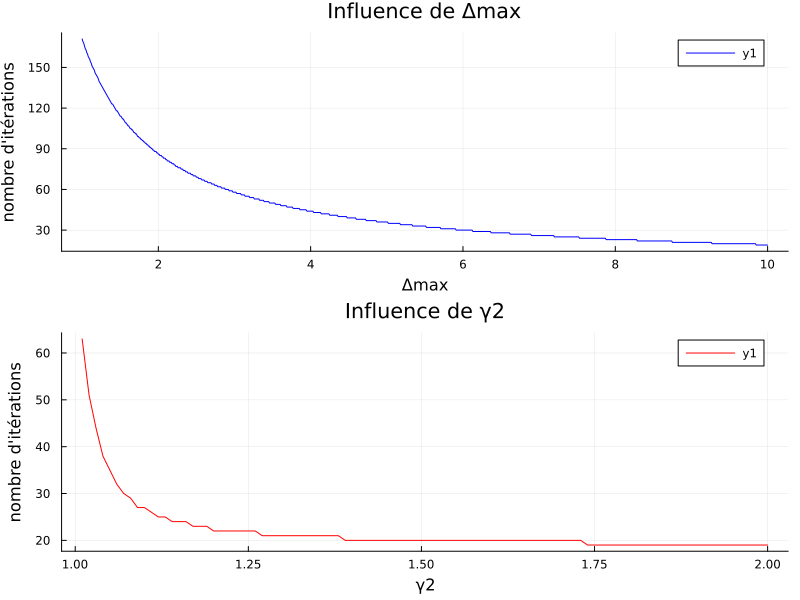

In [44]:
include("../src/regions_de_confiance.jl")
include("../src/newton.jl")
include("../test/fonctions_de_tests.jl")

using Plots
x0 = [100,100,100]

# Etude de Δmax
val1 = 1:0.01:10
nb = []
for elt in val1
    x_sol, f_sol, flag, nb_iters = regions_de_confiance(fct1, grad_fct1, hess_fct1, x0, algo_pas = "cauchy",Δmax=elt)
    nb = vcat(nb,[nb_iters])
end

p1 = plot(val1,nb,title="Influence de Δmax",xlabel="Δmax",ylabel="nombre d'itérations",color="blue")

# Etude de γ2
val2 = 1.01:0.01:2
nb = []
for elt in val2
    x_sol, f_sol, flag, nb_iters = regions_de_confiance(fct1, grad_fct1, hess_fct1, x0, algo_pas = "cauchy",γ2=elt)
    nb = vcat(nb,[nb_iters])
end

p2 = plot(val2,nb,title="Influence de γ2",xlabel="γ2",ylabel="nombre d'itérations",color="red")

plot(p1, p2, layout=(2,1), size=(800,600))

# Régions de confiance avec gradient conjugué tronqué

## Implémentation 

1. Implémenter l’algorithme du gradient conjugué tronqué (fichier `src/gct.jl`). Sa spécification est dans le fichier.
2. Vérifier que les tests ci-dessous passent.

In [45]:
include("../src/gct.jl")
include("../test/tester_gct.jl")

#
tester_gct(gct);

Test Summary:             | Pass  Total  Time
Gradient conjugué tronqué |    9      9  0.0s


3. Intégrer l’algorithme du gradient conjugué tronqué dans le code des régions de confiance.
4. Vérifier que les tests ci-dessous passent.

In [46]:
include("../src/regions_de_confiance.jl")
include("../test/tester_rc_gct.jl")

#
afficher = false # si true, alors affiche les résultats des algorithmes

#
tester_rc_gct(regions_de_confiance, afficher);

Affichage des résultats des algorithmes : false

Test Summary: | Pass  Total  Time
RC et gct     |   15     15  0.4s


## Interprétation  

Nous proposons de comparer l'utilisation du pas de Cauchy avec celle du gradient conjugué tronqué dans l'algorithme des régions de confiance.

**Remarques.**
* Nous vous demandons de réaliser des expérimentations numériques pour les comparaisons demandées ci-après.
* Vous devez utiliser l'argument optionnel `max_iter_gct` et la sortie `xs` de l'algorithme des régions de confiance.
* Vous pouvez comparer l'écart en norme entre les itérés de l'algorithme et la solution du problème.
* Vous trouverez des choses utiles dans le fichier `test/fonctions_de_tests.jl`.

1. Comparer dans le cas où l'on force le gradient conjugué tronqué à ne faire qu'une seule itération. Que remarquez vous ?
2. Comparer dans le cas général. Que remarquez vous ?
3. Quels sont les avantages et inconvénients des deux approches ?

## Réponses

1. On remarque que pour le gradient conjugué tronqué, la solution est atteinte en beaucoup moins d'itérations. Cependant, l'algorithme semble au départ tendre plus rapidement vers la solution avec Cauchy.

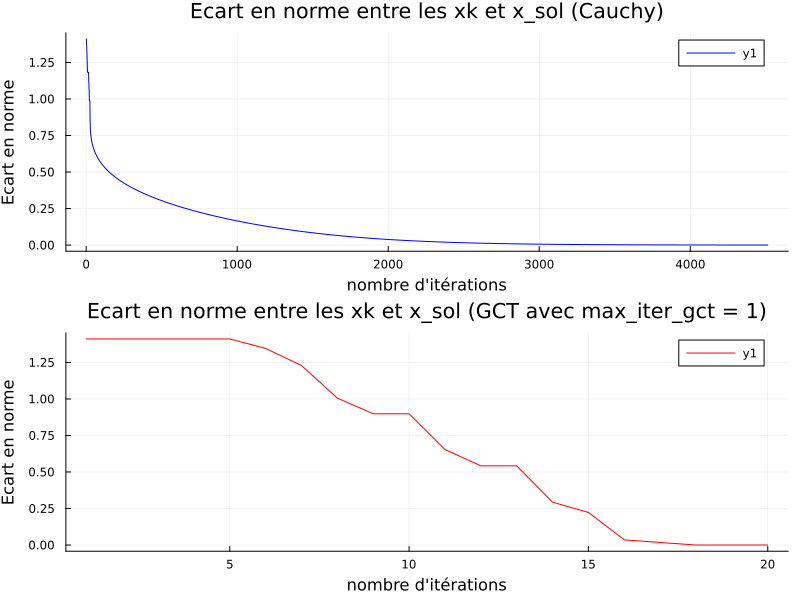

In [47]:
# Expérimentations numériques à faire ici.
# Vous pouvez utiliser le package Plots pour les affichages de courbes: using Plots

using Plots

include("../src/regions_de_confiance.jl")
include("../test/fonctions_de_tests.jl")

x0 = x023
xsol = sol_exacte_fct2

# Calcul avec Cauchy
x_sol, f_sol, flag, nb_iters, xs1 = regions_de_confiance(fct2, grad_fct2, hess_fct2, x0, algo_pas = "cauchy")
val1=[]
for pt in xs1
    val1 = vcat(val1,[norm(pt-xsol)])
end
p1 = plot(val1,title="Ecart en norme entre les xk et x_sol (Cauchy)",xlabel="nombre d'itérations",ylabel="Ecart en norme",color="blue")

# Calcul avec gradient conjugué tronqué
x_sol, f_sol, flag, nb_iters, xs2 = regions_de_confiance(fct2, grad_fct2, hess_fct2, x0, algo_pas = "gct", max_iter_gct=1)
val2=[]
for pt in xs2
    val2 = vcat(val2,[norm(pt-xsol)])
end
p2 = plot(val2,title="Ecart en norme entre les xk et x_sol (GCT avec max_iter_gct = 1)",xlabel="nombre d'itérations",ylabel="Ecart en norme",color="red")

plot(p1, p2, layout=(2,1), size=(800,600))

2. On observe des résultats similaires dans le cas général. Il semble donc qu'il ne soit pas utile d'effectuer plus d'une itération avec le gradient conjugué tronqué.

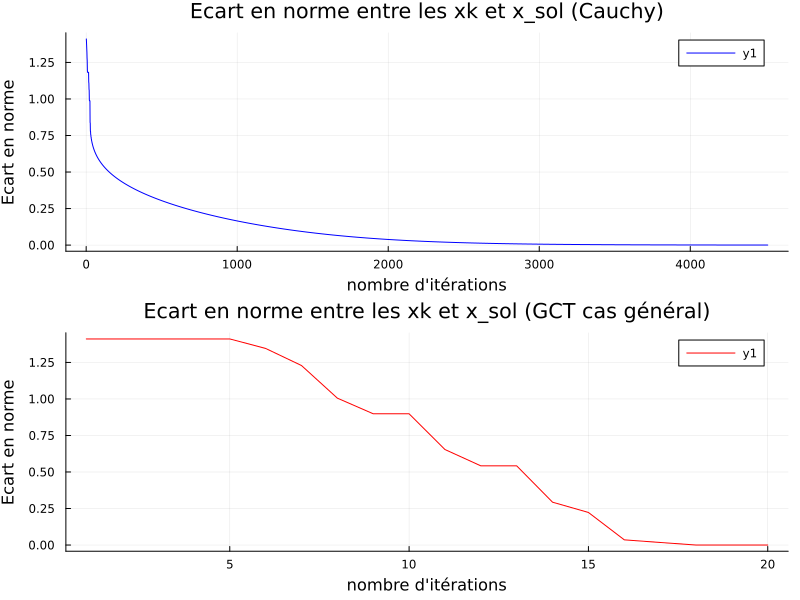

In [48]:
using Plots

include("../src/regions_de_confiance.jl")
include("../test/fonctions_de_tests.jl")

x0 = x023
xsol = sol_exacte_fct2

# Calcul avec Cauchy
x_sol, f_sol, flag, nb_iters, xs1 = regions_de_confiance(fct2, grad_fct2, hess_fct2, x0, algo_pas = "cauchy")
val1=[]
for pt in xs1
    val1 = vcat(val1,[norm(pt-xsol)])
end
p1 = plot(val1,title="Ecart en norme entre les xk et x_sol (Cauchy)",xlabel="nombre d'itérations",ylabel="Ecart en norme",color="blue")

# Calcul avec gradient conjugué tronqué
x_sol, f_sol, flag, nb_iters, xs2 = regions_de_confiance(fct2, grad_fct2, hess_fct2, x0, algo_pas = "gct", max_iter_gct=1)
val2=[]
for pt in xs2
    val2 = vcat(val2,[norm(pt-xsol)])
end
p2 = plot(val2,title="Ecart en norme entre les xk et x_sol (GCT cas général)",xlabel="nombre d'itérations",ylabel="Ecart en norme",color="red")

plot(p1, p2, layout=(2,1), size=(800,600))

3. Le pas de Cauchy a une décroissance plutôt lente. Cependant, une itération avec le pas de Cauchy est peu coûteuse en termes de temps de calcul. Cet algorithme peut être plus efficace si on a une tolérance absolue ou relative plutôt élevée. Le gradient conjugué tronqué décroit quant à lui beaucoup plus vite. Néanmoins, une itération avec cet algorithme est beaucoup plus coûteuse en termes de temps de calcul. Cet algorithme sera plus utile si on a besoin d'obtenir une solution plus précise.